# User Churn Prediction

### Pei-Yu Lan

**In this project, I use supervised machine learning models to identify the customers who are likely to stop using the service in the future. The features in the dataset will also be analyzed if they are the crucial factors to affect the user retention.**

* Supervised machine learning
* Logistic Regression (LR)
* K-Nearest Neighbors (KNN)
* Support Vector Machine (SVM)
* Random Forest(RF)
* XGBoost
* K-fold Cross-validation
* Confusion Matrix

In [269]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
#
# show all the columns
pd.set_option('display.max_columns', None)

churn_df = pd.read_csv('../data/churn.all.csv')

## Contents

<ul>
<li>[Part 1: Data Exploration] (#Part-1:-Data-Exploration)
<li>[Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
<li>[Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
<li>[Part 4: Feature Selection](#Part-4:-Feature-Selection)
</ul>

# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

#### There are 21 features and 5000 rows in this dataset.

In [270]:
print ("Num of rows: " + str(churn_df.shape[0])) # row count
print ("Num of columns: " + str(churn_df.shape[1]))

Num of rows: 5000
Num of columns: 21


In [271]:
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### Part 1.2: Data cleaning

#### There are some white space and extra dots in some columns so in order to further analyze the user churn rate, the data cleaning is necessary.

In [272]:
churn_df['voice_mail_plan'][0]

' yes'

In [273]:
churn_df['intl_plan'][0]

' no'

In [274]:
churn_df['churned'][0] 

' False.'

In [275]:
churn_df['voice_mail_plan'] = churn_df['voice_mail_plan'].map(lambda x: x.strip())
churn_df['intl_plan'] = churn_df['intl_plan'].map(lambda x: x.strip())
churn_df['churned'] = churn_df['churned'].map(lambda x: x.strip().strip('.'))

In [276]:
churn_df['voice_mail_plan'][0]

'yes'

In [277]:
churn_df['intl_plan'][0]

'no'

In [278]:
churn_df['churned'][0]

'False'

### Part 1.3: Understand the features

* Total Day Charge
* Total Evening Charge
* Total Night Charge

In [279]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0.5, 1.0, 'Total Day Charge')

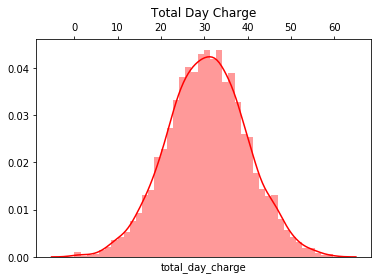

In [280]:
sns.distplot(churn_df['total_day_charge'], color = 'red')
plt.title('Total Day Charge')

Text(0.5, 1.0, 'Total Evening Charge')

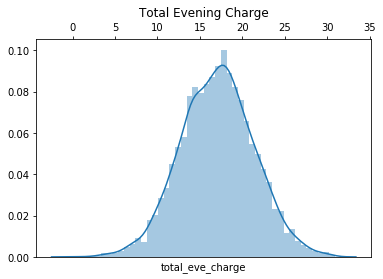

In [281]:
sns.distplot(churn_df['total_eve_charge'])
plt.title('Total Evening Charge')

Text(0.5, 1.0, 'Total Night Charge')

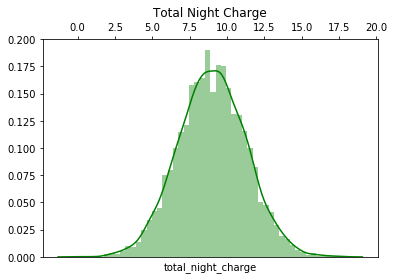

In [282]:
sns.distplot(churn_df['total_night_charge'], color = 'green')
plt.title('Total Night Charge')

Text(0.5, 1.0, 'Total International Charge')

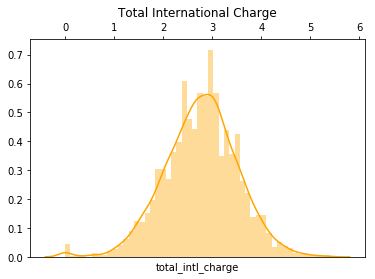

In [283]:
sns.distplot(churn_df['total_intl_charge'], color = 'orange')
plt.title('Total International Charge')

### Correlation table and plot

In [284]:
corr_df = churn_df[['account_length','number_vmail_messages','total_day_minutes', 
                    'total_day_calls', 'total_day_charge', 'total_eve_minutes',
                    'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
                    'total_night_calls', 'total_night_charge','total_intl_minutes', 
                    'total_intl_calls', 'total_intl_charge']]
corr_df.corr()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
account_length,1.000000,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.000656,0.001291,0.014277,0.001292
number_vmail_messages,-0.014575,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.005535,0.002463,0.000124,0.002505
total_day_minutes,-0.001017,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,0.011783,-0.019486,-0.001303,-0.019415
total_day_calls,0.028240,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.002802,0.013097,0.010893,0.013161
total_day_charge,-0.001019,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,0.011785,-0.019490,-0.001307,-0.019419
total_eve_minutes,-0.009591,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,-0.016642,0.000137,0.008388,0.000159
total_eve_calls,0.009143,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,0.001799,-0.007458,0.005574,-0.007507
total_eve_charge,-0.009587,0.019496,-0.010760,-0.000695,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,-0.016652,0.000132,0.008393,0.000155
total_night_minutes,0.000668,0.005541,0.011799,0.002804,0.011801,-0.016639,0.001781,-0.016649,1.000000,0.026972,0.999999,-0.006721,-0.017214,-0.006655
total_night_calls,-0.007825,0.002676,0.004236,-0.008308,0.004235,0.013420,-0.013682,0.013422,0.026972,1.000000,0.026949,0.000391,-0.000156,0.000368


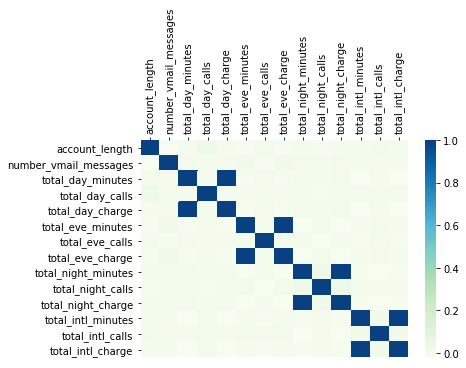

In [285]:
sns.heatmap(corr_df.corr(),cmap='GnBu')

**From the above correlation plot and table, we can tell that the charge of the days, the evenings and the nights are linearly correlated with their using time and the number of calls.**

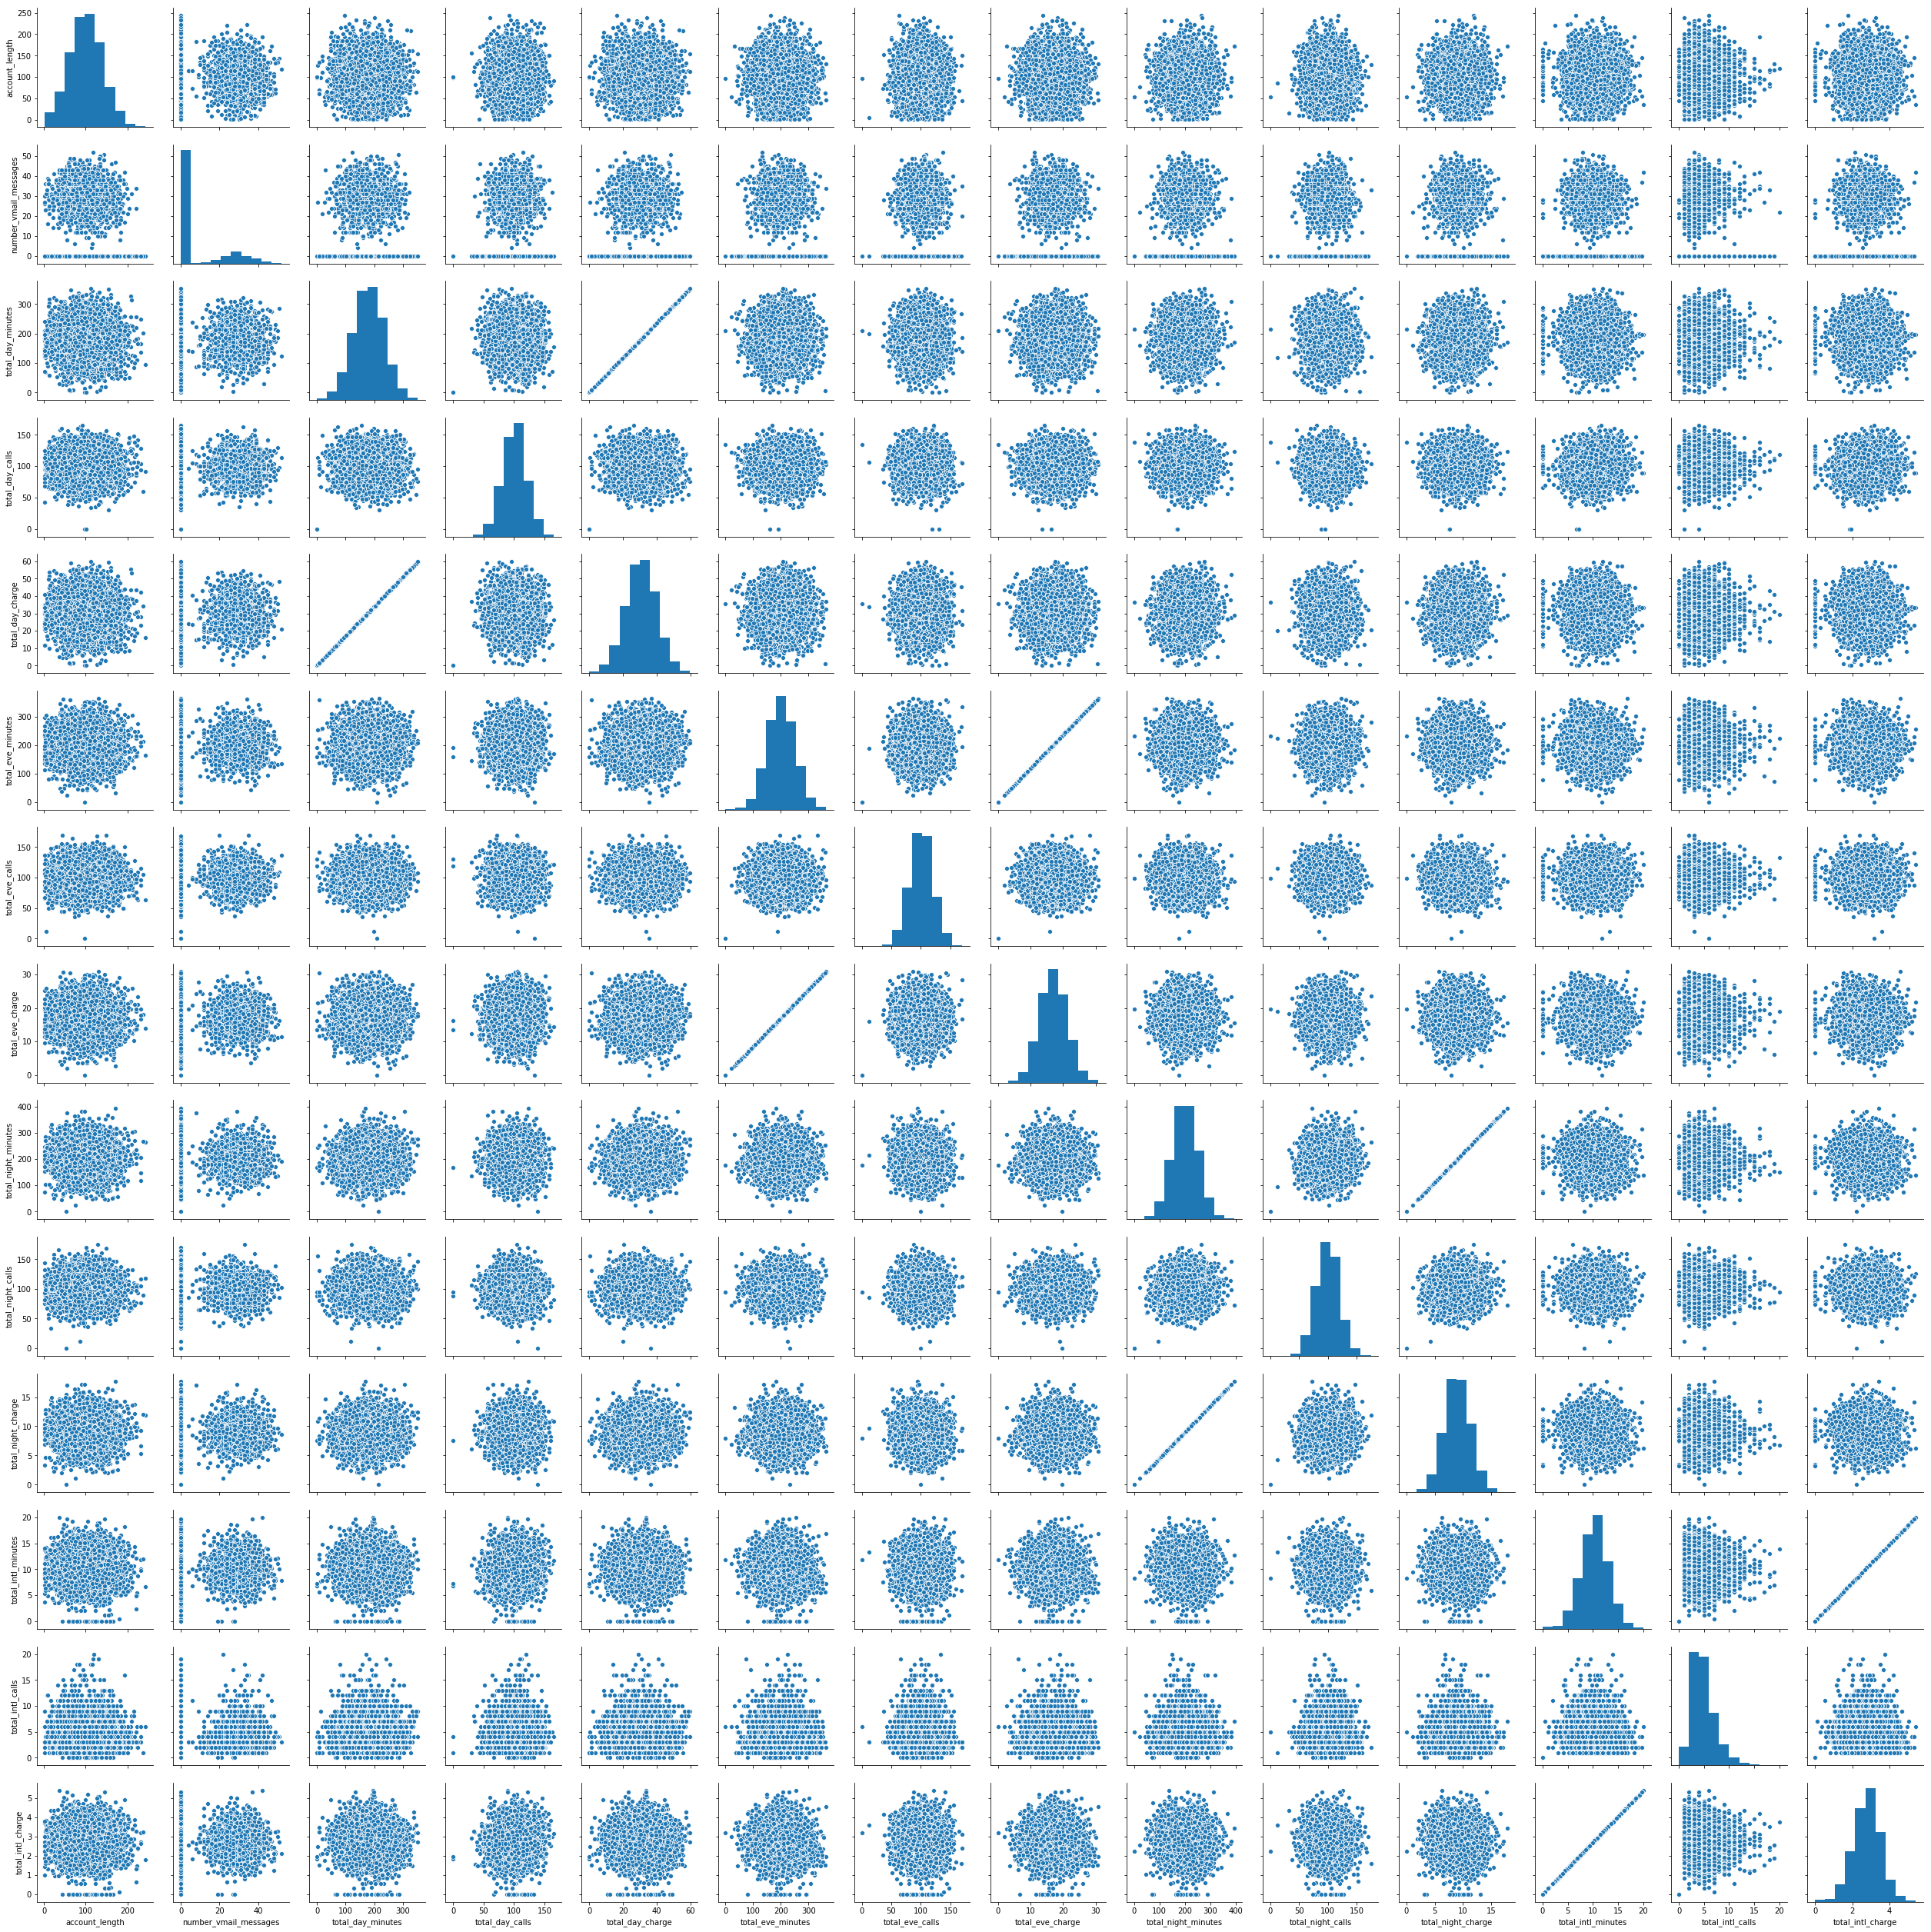

In [24]:
sns.pairplot(corr_df)

# Part 2: Feature Preprocessing

#### Drop some useless colums to develop the feature matrix.

In [286]:
# Get ground truth data
y = np.where(churn_df['churned'] == 'True',1,0)

to_drop = ['state','area_code','phone_number','churned']
churn_feat_space = churn_df.drop(to_drop, axis=1)

# to_drop = [area_code','phone_number','churned']
# churn_with_state = churn_df.drop(to_drop, axis = 1)
# churn_with_state = pd.get_dummies(churn_with_state, drop_first=True)
           
# yes and no have to be converted to boolean values
yes_no_cols = ["intl_plan","voice_mail_plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

In [287]:
X = churn_feat_space
X.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [288]:
# check the propotion of y = 1
print(y.sum() / y.shape * 100)

[14.14]


#### Scale the data (X features)

In [289]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [290]:
print ("Feature space holds {} observations and {} features".format(X.shape[0], X.shape[1]))
print ("Unique target labels:", np.unique(y))
print (pd.DataFrame(X).head())

Feature space holds 5000 observations and 17 features
Unique target labels: [0 1]
         0         1         2         3         4         5         6   \
0  0.698941 -0.323240  1.667120  1.273145  1.573802  0.502824  1.574074   
1  0.169849 -0.323240  1.667120  1.346973 -0.346802  1.158422 -0.347082   
2  0.925695 -0.323240 -0.599837 -0.572549  1.171125  0.704546  1.171286   
3 -0.409634  3.093675 -0.599837 -0.572549  2.210292 -1.463971  2.210457   
4 -0.636388  3.093675 -0.599837 -0.572549 -0.252163  0.654116 -0.252115   

         7         8         9         10        11        12        13  \
0 -0.064032 -0.060077 -0.063849  0.876999 -0.446928  0.876286 -0.094809   
1 -0.101621  0.141693 -0.101089  1.068992  0.154374  1.069818  1.245227   
2 -1.571562  0.494791 -1.572084 -0.748012  0.204483 -0.746737  0.701969   
3 -2.744745 -0.614946 -2.745155 -0.069110 -0.547145 -0.069377 -1.326194   
4 -1.035419  1.100103 -1.034426 -0.267041  1.056327 -0.267307 -0.058592   

         14     

In [291]:
X

array([[ 0.69894149, -0.32324017,  1.66712012, ..., -0.58423577,
        -0.0955088 , -0.43667564],
       [ 0.16984882, -0.32324017,  1.66712012, ..., -0.58423577,
         1.24598231, -0.43667564],
       [ 0.92569549, -0.32324017, -0.5998368 , ...,  0.22991664,
         0.69597096, -1.20223603],
       ...,
       [-0.98911606, -0.32324017, -0.5998368 , ..., -0.17715957,
         1.20573758, -0.43667564],
       [ 0.2202386 , -0.32324017, -0.5998368 , ...,  0.63699285,
        -0.63210525, -1.20223603],
       [-0.35924384, -0.32324017,  1.66712012, ...,  4.70775494,
        -0.35039211, -1.20223603]])

# Part 3: Model Training and Result Evaluation

### Part 3.1: Split dataset

In [292]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 0)

print('training data has {} observation with {} features'.format(X_train.shape[0], X_train.shape[1]))
print('test data has {} observation with {} features'.format(X_test.shape[0], X_test.shape[1]))

training data has 4000 observation with 17 features
test data has 1000 observation with 17 features


### Part 3.2: Model Training and Selection

#### Applying k-Fold Cross Validation to see the accuracies of the models, Random Forest, KNN and Logistic Regression.

In [293]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from xgboost import XGBClassifier

classifier_logistic = LogisticRegression(random_state = 0)
classifier_KNN = KNeighborsClassifier()
classifier_RF = RandomForestClassifier(random_state = 0)
classifier_SVC = SVC(random_state = 0)
classifier_XGBoost = XGBClassifier()

In [294]:
classifier_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [113]:
classifier_logistic.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [114]:
# Accuracy of test data
classifier_logistic.score(X_test, y_test)

0.874

In [295]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest','SVM', 'XGBoost']
model_list = [classifier_logistic, classifier_KNN, classifier_RF, classifier_SVC,classifier_XGBoost]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print('Model accuracy of {} is: {}'.format(model_names[count],round(cv_score.mean(),3)))
    count += 1

Model accuracy of Logistic Regression is: 0.864
Model accuracy of KNN is: 0.897
Model accuracy of Random Forest is: 0.95
Model accuracy of SVM is: 0.924
Model accuracy of XGBoost is: 0.951


### Part 3.3: Use Grid Search to Find Optimal Hyperparameters

Grid Search is used to select the best parameters for each machine learning model, which can enchance the performance of the model to predict users' behavior. 

In [296]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results
def print_grid_search_matrics(gs):
    print('Best accuracy: {}'.format(round(gs.best_score_,3)))
    print('Best parameter set:')
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print("\t{}: {}".format(param_name, best_parameters[param_name]))
#    print(best_parameter)  {'C': 1, 'penalty': 'l1'}
  

#### Part 3.3.1: Find Optimal Hyperparameters - Logistic Regression

In [297]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2

parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}

Grid_LR = GridSearchCV(LogisticRegression(random_state = 0),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [298]:
print_grid_search_matrics(Grid_LR)

Best accuracy: 0.864
Best parameter set:
	C: 1
	penalty: l1


* The best parameters for Logistic Regression: 

In [299]:
best_LR_model = Grid_LR.best_estimator_
best_LR_model

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Part 3.3.2: Find Optimal Hyperparameters: KNN

In [300]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[3,5,7,10] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 5, 7, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [301]:
print_grid_search_matrics(Grid_KNN)

Best accuracy: 0.897
Best parameter set:
	n_neighbors: 5


* The best parameters for KNN:

In [302]:
best_KNN_model = Grid_KNN.best_estimator_
best_KNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

#### Part 3.3.3: Find Optimal Hyperparameters: Random Forest

In [303]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees

parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(random_state = 0),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [304]:
print_grid_search_matrics(Grid_RF)

Best accuracy: 0.952
Best parameter set:
	n_estimators: 60


* The best parameters for Random Forest:

In [305]:
best_RF_model = Grid_RF.best_estimator_
best_RF_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

#### Part 3.3.4: Find Optimal Hyperparameters: SVM

In [306]:
# Possible hyperparamter options for SVM
# Choose the kernel

parameters = {
    'kernel' : ['linear', 'rbf', 'sigmoid', 'poly'],
    'degree': [3,4,5]
}

#Degree of the polynomial kernel function (‘poly’). (default=3) Ignored by all other kernels.

Grid_SVC = GridSearchCV(SVC(random_state = 0),parameters, cv=5)
Grid_SVC.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'rbf', 'sigmoid', 'poly'], 'degree': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [307]:
print_grid_search_matrics(Grid_SVC)

Best accuracy: 0.926
Best parameter set:
	degree: 3
	kernel: poly


In [308]:
best_SVC_model = Grid_SVC.best_estimator_
best_SVC_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

#### Part 3.3.5: Find Optimal Hyperparameters: XGBoost

In [309]:
# Possible hyperparamter options for XGBoost

parameters = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}


Grid_XGBoost = GridSearchCV(XGBClassifier(random_state = 0),parameters, cv=5)
Grid_XGBoost.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [310]:
print_grid_search_matrics(Grid_XGBoost)

Best accuracy: 0.96
Best parameter set:
	max_depth: 5
	min_child_weight: 1


In [311]:
best_XGBoost_model = Grid_XGBoost.best_estimator_
best_XGBoost_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### Comparison with different models

In [312]:
model_names = ['Logistic Regression','KNN','Random Forest','SVM', 'XGBoost']
model_list = [classifier_logistic, classifier_KNN, classifier_RF, classifier_SVC,classifier_XGBoost]
gs = [Grid_LR, Grid_KNN, Grid_RF, Grid_SVC, Grid_XGBoost]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print('Model accuracy of {} before parameter tuning is: {}'.format(model_names[count],round(cv_score.mean(),3)))
    print('Model accuracy of {} after parameter tuning is: {}'.format(model_names[count],round(gs[count].best_score_,3)))
    print('--------------------------------------------------------------------------')
    count += 1


Model accuracy of Logistic Regression before parameter tuning is: 0.864
Model accuracy of Logistic Regression after parameter tuning is: 0.864
--------------------------------------------------------------------------
Model accuracy of KNN before parameter tuning is: 0.897
Model accuracy of KNN after parameter tuning is: 0.897
--------------------------------------------------------------------------
Model accuracy of Random Forest before parameter tuning is: 0.95
Model accuracy of Random Forest after parameter tuning is: 0.952
--------------------------------------------------------------------------
Model accuracy of SVM before parameter tuning is: 0.924
Model accuracy of SVM after parameter tuning is: 0.926
--------------------------------------------------------------------------
Model accuracy of XGBoost before parameter tuning is: 0.951
Model accuracy of XGBoost after parameter tuning is: 0.96
--------------------------------------------------------------------------


### Part 3.4: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

#### After selecting the best parameters for each model, we are going to see their precision, recall and accuracy

class of interest as positive (user churn)

TP: correctly labeled real churn

Precision(PPV, positive predictive value): tp / (tp + fp);
Total number of true predictive churn divided by the total number of predictive churn;
High Precision means low fp, not many return users were predicted as churn users. 


Recall(sensitivity, hit rate, true positive rate): tp / (tp + fn)
Predict most postive or churn user correctly. High recall means low fn, not many churn users were predicted as return users.

In [313]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]

    accuracy  = (tp + tn) / (tp + fp + fn + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    print (classifier)
    print ("Accuracy is: {}".format(round(accuracy,3)))
    print ("Precision is: {}".format(round(precision,3)))
    print ("Recall is: {}".format(round(recall,3)))

# def draw_confusion_matrices(confusion_matricies):
#     class_names = ['Not','Churn']
#     for cm in confusion_matrices:
#         classifier, cm = cm[0], cm[1]
#         cal_evaluation(classifier, cm)
#         fig = plt.figure()
#         ax = fig.add_subplot(111)
#         cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
#         plt.title('Confusion matrix for {}'.format(classifier))
#         fig.colorbar(cax)
#         ax.set_xticklabels([''] + class_names)
#         ax.set_yticklabels([''] + class_names)
#         plt.xlabel('Predicted')
#         plt.ylabel('True')
#         plt.show()
        
def draw_confusion_matrix(confusion_matrices):   
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

        data = pd.DataFrame(cm, index = ['Not', 'Churn'], columns=['Not', 'Churn'])
        fig = plt.figure()
        ax = fig.add_subplot(111)

        sns.heatmap(data,cmap='Reds', annot=True,fmt="d")
        plt.title('Confusion Matrix of {}'.format(classifier))
        plt.ylabel('True')
        plt.xlabel('Predicted')
        plt.show()



Logistic Regression
Accuracy is: 0.874
Precision is: 0.5
Recall is: 0.214


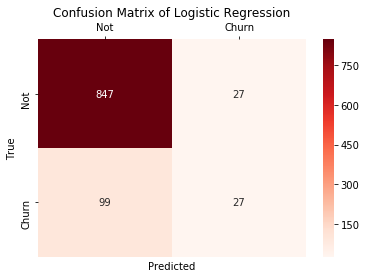

KNN
Accuracy is: 0.902
Precision is: 0.759
Recall is: 0.325


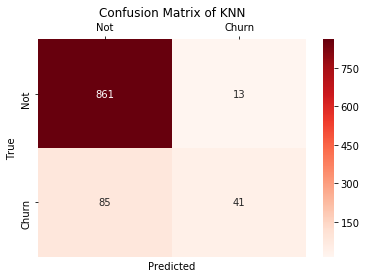

Random Forest
Accuracy is: 0.964
Precision is: 0.941
Recall is: 0.762


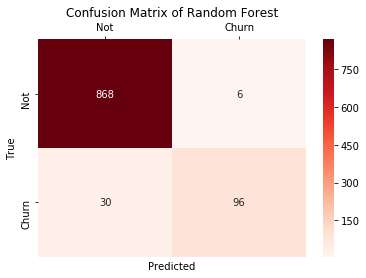

SVC
Accuracy is: 0.936
Precision is: 0.888
Recall is: 0.563


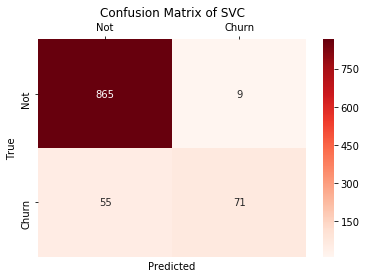

XGBoost
Accuracy is: 0.968
Precision is: 0.935
Recall is: 0.802


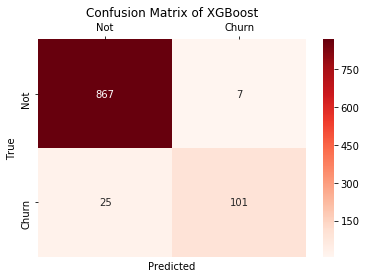

In [314]:
confusion_matrices = [
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("KNN", confusion_matrix(y_test,best_KNN_model.predict(X_test))),
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("SVC", confusion_matrix(y_test,best_SVC_model.predict(X_test))),
    ("XGBoost", confusion_matrix(y_test,best_XGBoost_model.predict(X_test)))   
]

draw_confusion_matrix(confusion_matrices)

### Peformance of the models:

From the above confusion matrices and matrics, XGBoost model and Random Forest (RF) model are the best 2 models.
XGBoost has the better recall rate than RF; however, RF performs better on precision than XGBoost.

we would like to capture more users who are likely to stop the service and the recall rate is tp / (tp + fn) predicting the churn users correctly out of the actual churn users. Therefore, the recall rate in this case is more important than precision. The higher recall rate is, the more churn users we capture from the uses who actually stop the serive.

Besides, XGBoost has the better acuracy than RF, which means that XGBoost has the better prediction in the overall.

* **XGBoost
    Accuracy is: 0.968
    Precision is: 0.935
    Recall is: 0.802**
* **Random Forest
    Accuracy is: 0.964
    Precision is: 0.941
    Recall is: 0.762**
    

In [ ]:
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True

### Part 3.4: Model Evaluation - ROC & AUC

#### Part 3.4.1: ROC of RF Model

In [315]:
from sklearn.metrics import roc_curve
from sklearn import metrics
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

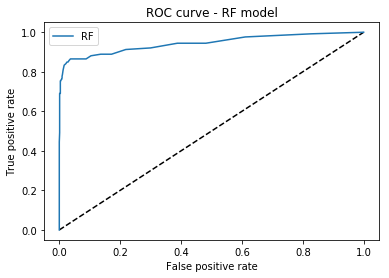

In [353]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [317]:
from sklearn import metrics
print('AUC of RF model:',metrics.auc(fpr_rf,tpr_rf))

AUC of RF model: 0.9444126620900077


#### Part 3.4.1: ROC of XGBoost Model

In [318]:
y_pred_xg = best_XGBoost_model.predict_proba(X_test)[:, 1]
fpr_xg, tpr_xg, _ = roc_curve(y_test, y_pred_xg)

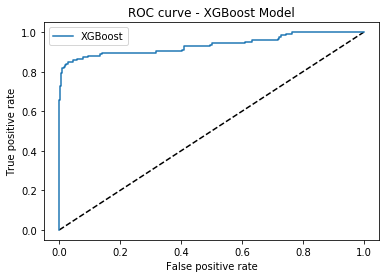

In [352]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_xg, tpr_xg, label='XGBoost')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - XGBoost Model')
plt.legend(loc='best')
plt.show()

In [320]:
from sklearn import metrics
print('AUC of XGBoost model:',metrics.auc(fpr_xg,tpr_xg))

AUC of XGBoost model: 0.935127674258109


# Part 4: Feature Selection (Optional)

top 1:  total_day_minutes
top 2:  total_eve_minutes
top 3:  total_night_minutes
top 4:  total_intl_minutes


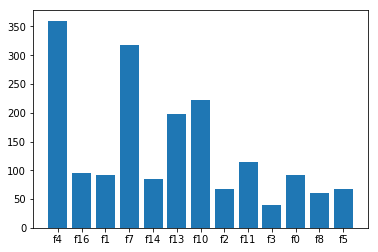

In [410]:
# print(best_XGBoost_model.feature_importances_)
# from xgboost import plot_importance
# plot_importance(best_XGBoost_model)
# plt.show()

feature_important = best_XGBoost_model.get_booster().get_score(importance_type='weight')
plt.bar(feature_important.keys(),feature_important.values())
print('top 1: ',churn_feat_space.columns[4])
print('top 2: ',churn_feat_space.columns[7])
print('top 3: ',churn_feat_space.columns[10])
print('top 4: ',churn_feat_space.columns[13])

In [187]:
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), churn_feat_space.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
total_day_minutes: 0.178
total_day_charge: 0.1211
number_customer_service_calls: 0.1127
intl_plan: 0.0809
total_eve_minutes: 0.0697
total_eve_charge: 0.0617
total_intl_calls: 0.0601
total_intl_minutes: 0.0456
total_intl_charge: 0.0444
total_night_charge: 0.0425
total_night_minutes: 0.038
total_day_calls: 0.0292
account_length: 0.0282
number_vmail_messages: 0.0259
total_night_calls: 0.0248
total_eve_calls: 0.0237
voice_mail_plan: 0.0137


# Part 5: Conclusion

* **Logistic Regression, K-Nearest Neighbor(KNN), Support Vector Machine(SVM), Randoom Forest(RF), XGBoost**

* **Among these 5 models, XGBoost and RF have better prediction performance**

* **XGBoost has the highest accuracy of 0.968 and its precision and recall are 0.935 and 0.802, respectively**

* **From the feature importance of XGBoost model, the more important features are the time of calls. (total_day_minutes, total_eve_minutes, total_night_minutes, total_intl_minutes...)**

* **The time of the calls play a pivotal part in whether the users are likely to stop using the serive.**